# Projet de TC1 : Apprentissage (Master AIC 2018/2019)

Le but de ce projet est de résoudre, de la façon la plus adéquate au challenge Kaggle "Otto Group Product Classification Challenge". 

Lien : https://www.kaggle.com/c/otto-group-product-classification-challenge)

Le présent Notebook a été entiérement développé en Python 3.7 et nécessite diverses librairies telles que Numpy, Matplotlib ou Pandas.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

## Récupération et exploration des données

L'objectif de cette étape est de récupérer les données du challenge, et de les créer dans les variables pertinentes afin que ces données soient aisément utiliseables.

A noter qu'il n'y a pas besoin de standardiser les données (en utilisant sklearn.preprocessing.StandardScaler) car les données fournies par le site Kaggle le sont déjà.

On divise le jeu d'entraînement initial en un jeu de d'entraînement (80% des données) et un jeu de validation (20% des données).

In [3]:
df_train = pd.read_csv(r"C:\Users\MyPC\Documents\AIC-partage\TC1\Projet kaggle\train.csv", index_col = 0)

print("Training set has {0[0]} rows and {0[1]} columns".format(df_train.shape))

Training set has 61878 rows and 94 columns


In [4]:
df_test = pd.read_csv(r"C:\Users\MyPC\Documents\AIC-partage\TC1\Projet kaggle\test.csv", index_col = 0)

In [5]:
print(df_train.head())

df_train.describe()

    feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
id                                                                           
1        1       0       0       0       0       0       0       0       0   
2        0       0       0       0       0       0       0       1       0   
3        0       0       0       0       0       0       0       1       0   
4        1       0       0       1       6       1       5       0       0   
5        0       0       0       0       0       0       0       0       0   

    feat_10   ...     feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  \
id            ...                                                            
1         0   ...           1        0        0        0        0        0   
2         0   ...           0        0        0        0        0        0   
3         0   ...           0        0        0        0        0        0   
4         1   ...           0        1        2        0       

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


On remarque que :
- aucune donnée n'est manquante (pour toutes les features, il y a bien 61878 données)
- toutes les données sont des 'int64' (à l'exception de la colonne target)
- un grand nombre de données sont égales à 0 (le 3ème quartile est encore égal à 0, qui est aussi la valeur minimale, pour de nombreuses features)

In [6]:
df_train['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

On remarque que :
- il y a 9 classes différentes ('Class_1', 'Class_2', ..., 'Class_9')
- certaines classes (2 et 6 notamment) sont sur-représentées dans le jeu d'entraînement fourni, en conséquences certaines classes (comme les classes 1,4,5 et 7) sont peu représentées

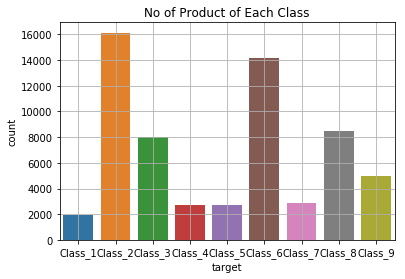

In [7]:
import seaborn as sn
sn.countplot(x='target', data=df_train)
plt.title("No of Product of Each Class")
plt.grid()
plt.show()

In [8]:
X = df_train.drop('target', 1).values
y = df_train['target'].values
print(X)
print(y)

[[ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  3 10  0]
 [ 0  0  0 ...  0  2  0]]
['Class_1' 'Class_1' 'Class_1' ... 'Class_9' 'Class_9' 'Class_9']


## Features Selection

In [9]:
# Reduction de dimension à l'aide de ACP

#Combien d'axes garde-t- on ?

# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA


list_var=[]
for i in range (1, 94):
    pca = PCA(n_components=i)
    fit = pca.fit(X)
    # summarize components
    list_var.append(fit.explained_variance_ratio_)


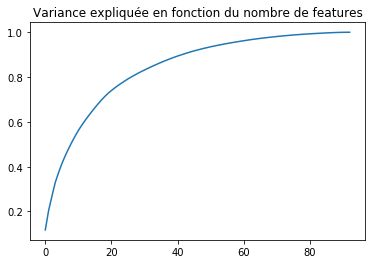

In [10]:
# A partir de 70 composantes : majeur partie de la variance expliquée
import matplotlib.pyplot as plt

var_explique_tot=[]
for variance in list_var:
    s=0
    for var in variance:
        s= s + var
    var_explique_tot.append(s)
plt.plot(var_explique_tot)
plt.title('Variance expliquée en fonction du nombre de features')
plt.show()
    

In [9]:
# On garde 70 axes avec la pca 
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
pca = PCA(n_components=70)
fit = pca.fit(X)
X= pca.fit_transform(X)
X.shape

(61878, 70)

In [ ]:
# Si on ne fait pas PCA une alternative est de prendre seulement les 70 features ayant le plus fort taux de corrélations
# pour des calculs plus rapide
# Reduction de dimension 93 à 70 features à l'aide du score khi 2 (corrélations)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
# feature extraction
test = SelectKBest(score_func=chi2, k=70)
fit = test.fit(X, y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
X= fit.transform(X)
# summarize selected features


In [ ]:
# 2 eme façon d'extraire les features importances les plus important : arbre 

# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np


# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
tab = model.feature_importances_
# Récuperer les index des  70 features les plus important selon l'extra trees classifier
index_features  = tab.argsort()[-70:][::-1]


In [9]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
print(y)

[0 0 0 ... 8 8 8]


## Préparations des données
Standardisation et créations des points SMOTE

In [10]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN    #Over sampling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
X_resampled = sc.fit_transform(X_resampled)

In [11]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)



#X_test = sc.fit_transform(X_test)


## Fonction utilitaire pour afficher la performance d'un modèle

La fonction print_performances définie ci-après, a pour objectif d'afficher certaines caractéristiques d'un model entraîné qui nous permettent de comprendre les forces et les faiblesses de ce modèle.

En particulier, print_performaces affiche :
- la logloss sur le jeu d'entraînement
- l'accuracy sur le jeu d'entraînement
- la logloss sur le jeu de validation
- l'accuracy sur le jeu de validation
- la matrice de confusion normalisée sur le jeu de validation

La logloss est la fonction objective, l'objectif du présent exercice est de la minimiser.

L'accuracy est la proportion de classes correctement prédites du modèle.

La principale différence entre l'accuracy et la logloss est que la logloss 

L'intérêt d'afficher ces mesures de performances à la fois pour le jeu d'entraînement et le jeu de validation est de pouvoir aisément reconnaître des cas de surajustement. 

La matrice de confusion est une matrice telle que chaque colonne de la matrice représente le nombre d'occurrences d'une classe estimée, tandis que chaque ligne représente le nombre d'occurrences d'une classe réelle. Il est difficile de tirer rapidement les informations clés d'une matrice de 9x9=81 valeurs. Afin d'en simplifier la lecture, on l'affichera sous forme d'une image de 9x9 pixels. Plus un pixel est blanc, plus la valeur est élevés. De plus, on affiche la matrice normalisée : dans ce cas, un système de classification sera d'autant meilleur que sa matrice de confusion s'approchera d'une matrice diagonale

In [12]:
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

def print_performances(model): 
    
    # Pour le jeu d'entraînement
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)
    print("JEU D'ENTRAÎNEMENT")
    print("Logloss : " + str(log_loss(y_train, y_train_pred_proba))) # the labels in y_pred are assumed to be ordered alphabetically
    print("Acccuracy : " + str(accuracy_score(y_train_pred, y_train)))
    
    # Pour le jeu de validation
    y_valid_pred = model.predict(X_valid)
    y_valid_pred_proba = model.predict_proba(X_valid)
    print("\nJEU DE VALIDATION")
    print("Logloss : " + str(log_loss(y_valid, y_valid_pred_proba))) # the labels in y_pred are assumed to be ordered alphabetically
    print("Acccuracy : " + str(accuracy_score(y_valid_pred, y_valid)))
    
    # Création et affichage de matrice de confusion normalisée
    conf_mx = confusion_matrix(y_valid, y_valid_pred) # les classes sont classées par ordre alphabetique
    conf_mx_normalized = np.array(list(map(lambda ligne : ligne/ligne.sum(), conf_mx)))
    
    plt.matshow(conf_mx_normalized, cmap=plt.cm.gray)
    plt.xticks(range(9), range(1, 10))
    plt.yticks(range(9), range(1, 10))
    plt.title("Matrice de confusion normalisée \n(sur le jeu de validation)\n")
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.show()
    
    return(y_valid_pred_proba)

### 2.2 Test sur différents modèles

Nous allons tester plusieurs modèles :
- SGDClassifier
- Régression Logistique
- Arbre de Décision
- RandomForest

Nous excluront les méthodes de deep learning car elles ne font pas l'objet du cours de TC1. De même, nous ne nous intéresseront pas aux SVM car sklearn.svm.SVC est quadratique en fonction du nombre de produits du jeu d'entraînement et sklearn.svm.LinearSVC n'a pas de méthode predict_proba, nécessaire au calcul de la logloss.

JEU D'ENTRAÎNEMENT
Logloss : 0.14249285340796997
Acccuracy : 0.9999797987960083

JEU DE VALIDATION
Logloss : 0.649223078582847
Acccuracy : 0.8087427278603749


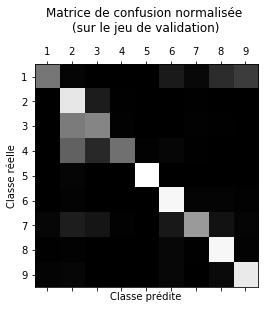

array([[0.  , 0.74, 0.16, ..., 0.02, 0.04, 0.  ],
       [0.06, 0.04, 0.  , ..., 0.02, 0.04, 0.  ],
       [0.  , 0.9 , 0.08, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.96, 0.04, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.46, 0.46, ..., 0.02, 0.  , 0.  ]])

In [13]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

rfc.fit(X_train, y_train)

print_performances(rfc)

JEU D'ENTRAÎNEMENT
Logloss : 0.2758040465060346
Acccuracy : 0.9749303058462284

JEU DE VALIDATION
Logloss : 0.6069193965950194
Acccuracy : 0.8010665804783452


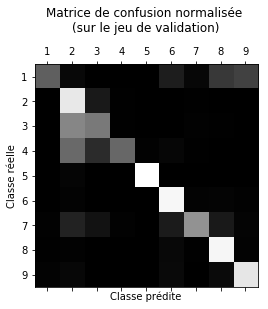

array([[0.   , 0.776, 0.112, ..., 0.012, 0.016, 0.044],
       [0.044, 0.016, 0.012, ..., 0.016, 0.016, 0.012],
       [0.   , 0.816, 0.18 , ..., 0.   , 0.   , 0.004],
       ...,
       [0.004, 0.908, 0.068, ..., 0.   , 0.008, 0.   ],
       [0.   , 0.968, 0.024, ..., 0.   , 0.   , 0.   ],
       [0.012, 0.564, 0.372, ..., 0.008, 0.   , 0.   ]])

In [14]:
rfcbag = BaggingClassifier(rfc, n_estimators=5)
rfcbag.fit(X_train, y_train)
print_performances(rfcbag)

JEU D'ENTRAÎNEMENT
Logloss : 0.11522057861532606
Acccuracy : 0.9994343662882308

JEU DE VALIDATION
Logloss : 0.48875402850230165
Acccuracy : 0.8206205559146735


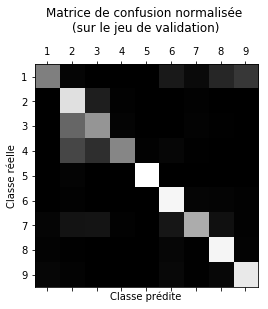

In [15]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_rfc = CalibratedClassifierCV(rfc, method='isotonic', cv=5)

calibrated_rfc.fit(X_train, y_train)

L_calibrated_rfc = print_performances(calibrated_rfc)

In [16]:
print(L_calibrated_rfc)

[[7.03688643e-03 8.67355314e-01 1.08423924e-01 ... 1.82766469e-03
  8.30128986e-04 2.20587272e-03]
 [2.80879060e-02 1.39143659e-03 1.08899401e-03 ... 4.67046338e-03
  1.95148853e-03 6.55181602e-03]
 [1.01929040e-03 9.20929310e-01 7.28522662e-02 ... 1.74048289e-03
  5.22792779e-04 5.06243003e-04]
 ...
 [1.05257963e-03 9.71804319e-01 1.67481508e-02 ... 3.85315594e-03
  5.48151641e-04 5.28989787e-04]
 [1.05201681e-03 9.89768732e-01 2.63223813e-03 ... 1.80946045e-03
  5.47334724e-04 5.26683185e-04]
 [1.62066269e-03 5.25945611e-01 4.45679933e-01 ... 5.50817443e-03
  5.24905069e-04 5.04536620e-04]]


JEU D'ENTRAÎNEMENT
Logloss : 0.6637377367369555
Acccuracy : 0.7558482485556139

JEU DE VALIDATION
Logloss : 0.6675734281484841
Acccuracy : 0.7569489334195216


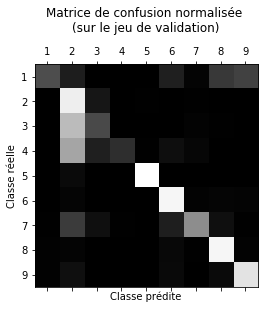

array([[1.20185416e-05, 8.90681010e-01, 7.58147135e-02, ...,
        2.04385314e-05, 9.45921758e-06, 6.49720580e-04],
       [4.30584988e-02, 1.74309646e-01, 7.13603388e-02, ...,
        3.15119014e-02, 4.78435397e-02, 3.14458611e-02],
       [6.27396905e-04, 6.64157244e-01, 1.83948651e-01, ...,
        1.71847864e-03, 5.50386923e-04, 1.89944152e-03],
       ...,
       [2.03402039e-03, 6.60710654e-01, 1.79058006e-01, ...,
        8.98349727e-03, 2.72021330e-03, 5.38323977e-03],
       [1.58432534e-03, 8.30610956e-01, 1.34415022e-01, ...,
        1.48326618e-02, 5.36602980e-04, 6.62131215e-03],
       [3.55244615e-03, 5.87873312e-01, 3.22428907e-01, ...,
        1.20550660e-02, 4.65961724e-03, 4.31091778e-03]])

In [17]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print_performances(logreg)

In [18]:
noOfFeature = 45

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(rfc, noOfFeature)
fit = rfe.fit(X_train, y_train)

print(("Num Features: %d") % fit.n_features_)
print(("Selected Features: %s") % fit.support_)
print(("Feature Ranking: %s") % fit.ranking_)

Num Features: 45
Selected Features: [False False  True False False False False  True  True False  True False
 False  True  True  True  True False False False False False False  True
  True  True  True False False False False  True  True  True  True  True
 False  True  True  True False  True  True False False False False  True
 False  True False False  True  True False False  True False  True  True
 False  True False  True False False  True  True  True  True  True  True
 False False  True  True False  True False  True False False False False
  True  True False  True False  True False False False]
Feature Ranking: [ 4 33  1 10 43 49 39  1  1 28  1 41 15  1  1  1  1 18 29  8 31 11 34  1
  1  1  1 37 27  5 46  1  1  1  1  1 13  1  1  1  6  1  1 21 30 16  2  1
 40  1 47 36  1  1 19 14  1 17  1  1 20  1 35  1 32  3  1  1  1  1  1  1
 24 22  1  1 38  1 23  1 44 45  9 48  1  1 12  1 25  1 26  7 42]


In [19]:
features = []
Xcol=df_train.drop('target', 1)
for i , j in zip(Xcol.columns,fit.support_):
    if j == True:
        features.append(str(i))

print(len(features))
print(features)

45
['feat_3', 'feat_8', 'feat_9', 'feat_11', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_24', 'feat_25', 'feat_26', 'feat_27', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_38', 'feat_39', 'feat_40', 'feat_42', 'feat_43', 'feat_48', 'feat_50', 'feat_53', 'feat_54', 'feat_57', 'feat_59', 'feat_60', 'feat_62', 'feat_64', 'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_75', 'feat_76', 'feat_78', 'feat_80', 'feat_85', 'feat_86', 'feat_88', 'feat_90']


In [20]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from statistics import mean
from scipy.optimize import minimize

In [21]:
clf=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=.8,subsample=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       missing=None, n_estimators=100, nthread=2,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True)
scores = cross_val_score(clf,Xcol[features], y, cv=2)

In [22]:
print(scores)
print("Accuracy:",np.mean(scores))

[0.77690518 0.77870442]
Accuracy: 0.7778047997306605


JEU D'ENTRAÎNEMENT
Logloss : 0.6212024163004507
Acccuracy : 0.8295826431255303

JEU DE VALIDATION
Logloss : 0.7786510332700958
Acccuracy : 0.7487071751777634


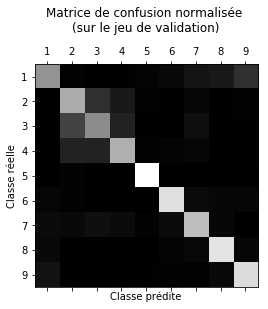

array([[8.68454662e-03, 7.20103830e-01, 1.39548523e-01, ...,
        6.76883780e-03, 1.64958286e-02, 1.53256705e-03],
       [6.48753215e-03, 1.66465620e-03, 1.33747313e-03, ...,
        5.26116135e-03, 8.82878649e-03, 1.06836769e-02],
       [1.34729064e-02, 6.39179098e-01, 2.07723692e-01, ...,
        1.63643077e-02, 1.06403528e-02, 2.18534069e-02],
       ...,
       [7.32600733e-03, 6.13716546e-01, 2.13340796e-01, ...,
        6.80803826e-02, 4.76190476e-03, 4.02930403e-03],
       [2.43727871e-03, 8.32087445e-01, 8.18090251e-02, ...,
        5.89827717e-03, 3.11526480e-04, 6.23052960e-04],
       [2.23463687e-03, 3.40437921e-01, 4.90957199e-01, ...,
        2.08311089e-02, 1.21758848e-03, 6.22759346e-03]])

In [23]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN    #Over sampling

#X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)


forest_clf = RandomForestClassifier(random_state = 42, max_depth=25, min_samples_split=25 ) #, class_weight='balanced')
forest_clf.fit(X_resampled, y_resampled)

print_performances(forest_clf)

JEU D'ENTRAÎNEMENT
Logloss : 0.6212024163004507
Acccuracy : 0.8295826431255303

JEU DE VALIDATION
Logloss : 0.7786510332700958
Acccuracy : 0.7487071751777634


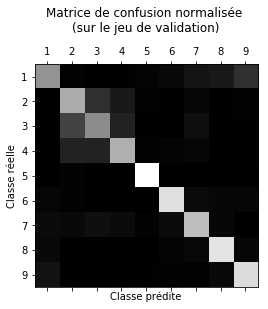

array([[8.68454662e-03, 7.20103830e-01, 1.39548523e-01, ...,
        6.76883780e-03, 1.64958286e-02, 1.53256705e-03],
       [6.48753215e-03, 1.66465620e-03, 1.33747313e-03, ...,
        5.26116135e-03, 8.82878649e-03, 1.06836769e-02],
       [1.34729064e-02, 6.39179098e-01, 2.07723692e-01, ...,
        1.63643077e-02, 1.06403528e-02, 2.18534069e-02],
       ...,
       [7.32600733e-03, 6.13716546e-01, 2.13340796e-01, ...,
        6.80803826e-02, 4.76190476e-03, 4.02930403e-03],
       [2.43727871e-03, 8.32087445e-01, 8.18090251e-02, ...,
        5.89827717e-03, 3.11526480e-04, 6.23052960e-04],
       [2.23463687e-03, 3.40437921e-01, 4.90957199e-01, ...,
        2.08311089e-02, 1.21758848e-03, 6.22759346e-03]])

In [24]:
#X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)


forest_clf = RandomForestClassifier(random_state = 42, max_depth=25, min_samples_split=25 ) #, class_weight='balanced')
forest_clf.fit(X_resampled, y_resampled)

print_performances(forest_clf)

(116082,)
[2 1 2 ... 8 8 8]


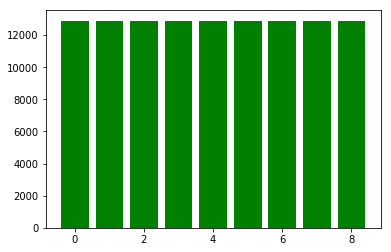

In [25]:
print(y_resampled.shape)
print(y_resampled)

from collections import Counter
count = Counter(cat for cat in y_resampled)
d_count=dict(count)

plt.bar(list(d_count.keys()), d_count.values(), color='g')
plt.show()

# TEST EXEMPLES

### XGBOOST

[2 1 2 ... 1 5 5]
log_loss xgboost train  0.10228561976234958
precision xgboost train  0.9807886550038383
log_loss xgboost val  0.48751471527939577
precision xgboost val  0.8195701357466063


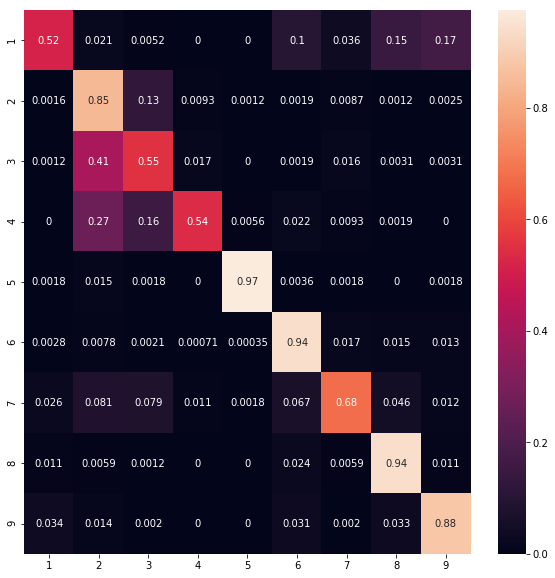

In [26]:
import xgboost as xgb
print(y_train)
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_valid)

param = {
        'booster': 'gbtree',

   ' learning_rate': 0.01,
    'max_depth': 14,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  #  softprob pour récuper proba , softmax pour récuperer directement les classes
    'eval_metric':'mlogloss',  # metrics multi class log_loss
    'scale_pos_weight': 1 , # par défault égale à 1 mais utile pour les unbalanced data
    'num_class': 9}  # the number of classes that exist in this datset

num_round = 50  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)

# make prediction
preds = bst.predict(dvalid)
preds_train= bst.predict(dtrain)

# train 
print ('log_loss xgboost train ' , log_loss(y_train, preds_train, eps=1e-15, normalize=True, sample_weight=None, labels=None))
print('precision xgboost train ', (np.argmax(preds_train, axis= 1 )==y_train).mean())


# validation 
print ('log_loss xgboost val ' , log_loss(y_valid, preds, eps=1e-15, normalize=True, sample_weight=None, labels=None))
print('precision xgboost val ', (np.argmax(preds, axis= 1 )==y_valid).mean())

y_pred= np.argmax(preds, axis= 1 )
array = confusion_matrix(y_valid, y_pred)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]


df_cm = pd.DataFrame(array, index = list(range(1,10)) , columns = list(range(1,10)))
plt.figure(figsize = (10,10))
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
sn.heatmap(df_cm, annot=True)
plt.show()

In [27]:
preds_xgboost_woutsmote= preds

### Xgboost avec SMOTE

log_loss xgboost + Smote train   0.20266848798160209
precision xgboost + Smote train  0.9431091814407057
log_loss xgboost + Smote val  0.5565597623541405
precision xgboost + Smote val  0.7881383322559793


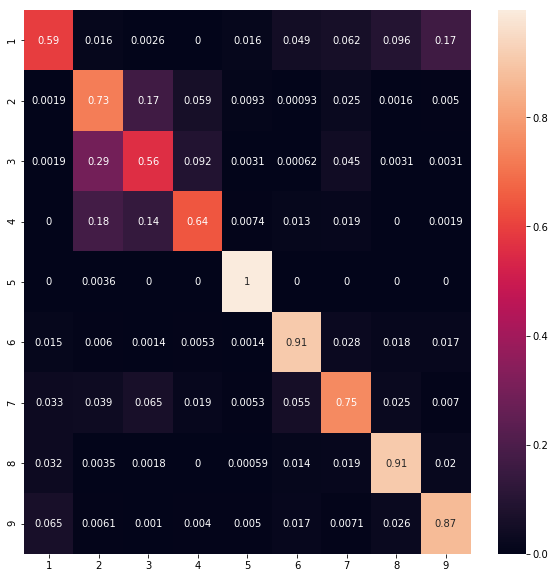

In [28]:
#Avec SMOTE oversampling 

from sklearn.metrics import log_loss

#encode into number 
y_valid_num = LabelEncoder().fit_transform(y_valid)  #0 correspond à classe 1 , 1 à classe 2 ... suffit de faire +1 sur les labels
y_train_num = LabelEncoder().fit_transform(y_train)

#X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train_num)

# read in data
dtrain = xgb.DMatrix(X_resampled, y_resampled)
dtest = xgb.DMatrix(X_valid)

param = {
        'booster': 'gbtree',

   ' learning_rate': 0.01,
    'max_depth': 10,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  #  softprob pour récuper proba , softmax pour récuperer directement les classes
    'eval_metric':'mlogloss',  # metrics multi class log_loss

    'num_class': 9}  # the number of classes that exist in this datset

num_round = 50  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
preds_train= bst.predict(dtrain)

# train 
print ('log_loss xgboost + Smote train  ' , log_loss(y_resampled, preds_train, eps=1e-15, normalize=True, sample_weight=None, labels=None))
print('precision xgboost + Smote train ', (np.argmax(preds_train, axis= 1 )==y_resampled).mean())

#val
log_loss(y_valid_num, preds, eps=1e-15, normalize=True, sample_weight=None, labels=None)
print("log_loss xgboost + Smote val ",log_loss(y_valid_num, preds, eps=1e-15, normalize=True, sample_weight=None, labels=None))
print("precision xgboost + Smote val ",(np.argmax(preds, axis= 1 )==y_valid_num).mean())

#Resultat après over sampling SMOTE , pas ultra bénéfique 
y_pred= np.argmax(preds, axis= 1 )
y_test = y_valid_num
array = confusion_matrix(y_test, y_pred)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]


df_cm = pd.DataFrame(array, index = list(range(1,10)) , columns = list(range(1,10)))
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
plt.show()

In [29]:
pred_xgboost = preds
print(pred_xgboost)

[[5.64524496e-04 9.91260469e-01 4.52351710e-03 ... 7.30481624e-05
  5.27918164e-04 2.09382735e-03]
 [4.26305400e-04 1.88917038e-04 8.76032573e-05 ... 2.56438798e-04
  2.16401822e-04 4.41715092e-04]
 [2.27581616e-03 9.06359076e-01 8.45909268e-02 ... 1.32511416e-03
  7.98132736e-04 1.35040330e-03]
 ...
 [2.48890312e-04 9.58785713e-01 2.03214213e-02 ... 1.47043797e-03
  7.37830880e-04 3.50286515e-04]
 [2.84559472e-04 9.68584239e-01 1.23529229e-02 ... 3.32576525e-03
  1.02979655e-04 3.72157723e-04]
 [1.59261550e-03 5.54096460e-01 3.61978292e-01 ... 2.05439385e-02
  1.33444811e-03 1.64734886e-03]]


### Neural Network

In [30]:
# Neural Network
from keras.utils import to_categorical

print(X_resampled.shape, y_resampled.shape)

#x_train, y_train = X_resampled, y_resampled

y_resampled = to_categorical(y_resampled)
y_valid = to_categorical(y_valid)

Using TensorFlow backend.


(116082, 93) (116082,)


In [34]:
from keras import models
from keras import layers
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(93,)))
#model.add(Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(9, activation='softmax'))

In [35]:
x_train, y_train = X_resampled, y_resampled
x_val = x_train[:1000,:]
partial_x_train = x_train[1000:,:]
y_val = y_train[:1000, :]
partial_y_train = y_train[1000:,:]

In [36]:
from keras.optimizers import RMSprop
rms =RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['accuracy'])  #optimizer='rmsprop'

history = model.fit(partial_x_train, partial_y_train, epochs=60, batch_size=512, validation_data=(x_val, y_val))

Train on 115082 samples, validate on 1000 samples
Epoch 1/60
115082/115082 [==============================] - 3s 22us/step - loss: 0.8651 - acc: 0.6824 - val_loss: 0.6903 - val_acc: 0.7330
Epoch 2/60
115082/115082 [==============================] - 2s 20us/step - loss: 0.6320 - acc: 0.7592 - val_loss: 0.6303 - val_acc: 0.7420
Epoch 3/60
115082/115082 [==============================] - 2s 20us/step - loss: 0.5764 - acc: 0.7792 - val_loss: 0.5876 - val_acc: 0.7620
Epoch 4/60
115082/115082 [==============================] - 2s 18us/step - loss: 0.5374 - acc: 0.7940 - val_loss: 0.5844 - val_acc: 0.7530
Epoch 5/60
115082/115082 [==============================] - 2s 19us/step - loss: 0.5074 - acc: 0.8042 - val_loss: 0.5752 - val_acc: 0.7580
Epoch 6/60
115082/115082 [==============================] - 2s 20us/step - loss: 0.4853 - acc: 0.8134 - val_loss: 0.5324 - val_acc: 0.7730
Epoch 7/60
115082/115082 [==============================] - 2s 20us/step - loss: 0.4640 - acc: 0.8219 - val_loss: 0.

115082/115082 [==============================] - 2s 18us/step - loss: 0.2411 - acc: 0.9048 - val_loss: 0.6429 - val_acc: 0.8100
Epoch 60/60
115082/115082 [==============================] - 2s 18us/step - loss: 0.2410 - acc: 0.9058 - val_loss: 0.6894 - val_acc: 0.7950


In [37]:
y_pred = model.predict(X_valid)
np.mean(np.argmax(y_pred, axis=1)==np.argmax(y_valid, axis=1))

0.7462831286360698

In [38]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

In [39]:
np.sum(weights,axis=1)

array([ -0.04075885,   1.5232269 ,   3.3008678 ,   4.112608  ,
        -3.063424  ,   3.2205276 ,   0.36914575,  -5.6432924 ,
        -5.585807  ,  -1.6737154 ,   5.550315  ,   1.7623348 ,
        -1.1195958 ,  -2.8107493 ,  -3.0505896 ,   1.9482684 ,
        -3.1848855 ,   0.7080072 ,   6.651344  ,   2.7095647 ,
        -2.4730158 ,  -2.3227267 ,   0.4388675 ,   1.7823546 ,
        -1.9890373 ,  -2.330994  ,   4.2254353 ,   1.1907022 ,
        -0.56102   ,   2.4585807 ,   1.6660343 ,  -1.6865723 ,
        -0.7473952 ,   4.5885406 ,   0.731024  ,  -3.556724  ,
         0.3115896 ,   2.834159  ,   2.5556924 ,  -2.9581575 ,
         0.9587286 ,  -2.387631  ,  -6.6038427 ,   0.4206167 ,
         3.9219434 ,   3.3604283 ,  -2.254951  ,  -5.2219715 ,
         0.7793678 ,  -3.3398476 ,  -0.9022359 ,  -0.45415047,
        -7.8669405 ,  -0.61034596,  -4.4022307 ,  -4.609505  ,
         0.41676128,  -2.9397378 ,  -1.6107925 , -11.283295  ,
         2.1744554 ,  -1.6117728 ,  -3.3849897 ,  -5.50

In [40]:
nn_pred=y_pred
print(nn_pred)

[[2.8399447e-21 9.9997580e-01 2.1338052e-05 ... 8.6598440e-32
  4.6954224e-14 2.8339327e-06]
 [6.1445027e-18 1.0454326e-13 8.3634362e-18 ... 2.9496445e-14
  4.4969071e-14 6.1055101e-17]
 [1.5386808e-11 9.6023530e-01 3.9764632e-02 ... 3.7823706e-11
  5.0743076e-10 2.0047210e-08]
 ...
 [3.1891403e-13 7.4422228e-01 2.5351205e-01 ... 1.0606526e-07
  7.0996664e-10 3.5562866e-08]
 [2.9449504e-15 9.4886583e-01 5.0403699e-02 ... 1.2889521e-13
  3.5203018e-16 2.1714350e-13]
 [3.5996333e-02 4.9954110e-01 3.6589581e-01 ... 7.6768577e-02
  3.7408189e-03 7.9917191e-03]]


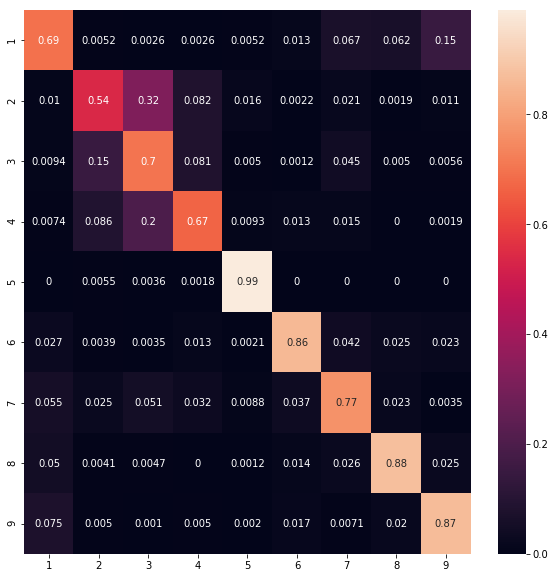

In [41]:
#Resultat après over sampling SMOTE Neural Network 
y_pred1= np.argmax(y_pred, axis=1)
y_valid1 = np.argmax(y_valid, axis=1)
array = confusion_matrix(y_valid1, y_pred1)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]


df_cm = pd.DataFrame(array, index = list(range(1,10)) , columns = list(range(1,10)))
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
plt.show()

### Combinaisons linéaires de modèles 

In [42]:
predictions = []
predictions.append(nn_pred)
predictions.append(pred_xgboost)
predictions.append(preds_xgboost_woutsmote)
predictions.append(L_calibrated_rfc)
print(len(predictions))

4


In [43]:
print(y)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print(y_valid)

[0 0 0 ... 8 8 8]
[1 4 1 ... 1 1 1]


In [44]:
def log_loss_func(weights):
    ''' scipy minimize will pass the weights as a numpy array '''
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction
    return log_loss(y_valid, final_prediction)

In [45]:
starting_values = [0.5]*len(predictions)
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
bounds = [(0,1)]*len(predictions)

In [46]:
res = minimize(log_loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

In [47]:
print(res)

     fun: 0.4533672783546637
     jac: array([0.05950908, 0.0640731 , 0.1222256 , 0.00551723])
 message: 'Optimization terminated successfully.'
    nfev: 41
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.10048516, 0.14592276, 0.45566057, 0.29793151])


In [48]:
# 0.45 avec 93 features , 0.46 avec 70 features ayant le + fort taux de corrélations k_best , 0.50 avec ACP 70 axe
print('Ensemble Score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))

Ensemble Score: 0.4533672783546637
Best Weights: [0.10048516 0.14592276 0.45566057 0.29793151]
